# Case Study: Cyclistic, a bike-Sharing business

Part of the Google Data Analytics Professional Certificate - Coursera

Copyright © 2024 Luis Esquivel

In [94]:
# Importing working modules
import pandas as pd
import os
from matplotlib import pyplot as plt
import pickle
import datetime
import seaborn as sns
sns.set_theme(style="whitegrid")

# For not modifying the original df by modifying its view.
pd.options.mode.copy_on_write = True

Checkpoint: go to [Analysis phase](#Analysis).

In [4]:
# DO NOT RUN AGAIN!!!
## Already run.

### Importing CSV files.
fpath = "C:\\Users\\luisc\\OneDrive - Colegio Federado de Ingenieros y de Arquitectos\\DataScience&Coding\\CaseStudies\\2_BikeShareBusiness_GoogleDataAnalystics_Coursera\\workedData"

td_dict = {}

for fname in os.listdir(fpath):
    if ".csv" in fname:
        print("Importing {}".format(fname))
        td_dict[fname[0:6]] = pd.read_csv(fpath + '\\' + fname)

### Check if all files loaded have identical headers.
df_cols = list()
for key in td_dict:
   df_cols.append(list(td_dict[key].columns))

if all(i == df_cols[0] for i in df_cols): 
    print("All files loaded have identical headers. Concatenating all dfs ...")
    td_df = pd.concat(td_dict.values(), ignore_index=True)

### Store data (serialize).
    print("Serializing td_df into pickle.")
    td_df.to_pickle(fpath + '\\' + 'td_df.pickle')

    print(td_df.shape)
    td_df.head(3)

else:
    print("At least one file have different headers. It's not safe to concatenate all dfs.")

Importing 202302-divvy-tripdata.csv
Importing 202303-divvy-tripdata.csv
Importing 202304-divvy-tripdata.csv
Importing 202305-divvy-tripdata.csv
Importing 202306-divvy-tripdata.csv
Importing 202307-divvy-tripdata.csv
Importing 202308-divvy-tripdata.csv
Importing 202309-divvy-tripdata.csv
Importing 202310-divvy-tripdata.csv
Importing 202311-divvy-tripdata.csv
Importing 202312-divvy-tripdata.csv
Importing 202401-divvy-tripdata.csv
All files loaded have identical headers. Concatenating all dfs ...
Serializing td_df into pickle.
(5674449, 13)


In [2]:
# Load data (deserialize).
fpath = "C:\\Users\\luisc\\OneDrive - Colegio Federado de Ingenieros y de Arquitectos\\DataScience&Coding\\CaseStudies\\2_BikeShareBusiness_GoogleDataAnalystics_Coursera\\workedData"

td_df = pd.read_pickle(fpath + '\\' + 'td_df.pickle')
print(td_df.shape)
td_df.head(3)

(5674449, 13)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CBCD0D7777F0E45F,classic_bike,2023-02-14 11:59:42,2023-02-14 12:13:38,Southport Ave & Clybourn Ave,TA1309000030,Clark St & Schiller St,TA1309000024,41.920771,-87.663712,41.907993,-87.631501,casual
1,F3EC5FCE5FF39DE9,electric_bike,2023-02-15 13:53:48,2023-02-15 13:59:08,Clarendon Ave & Gordon Ter,13379,Sheridan Rd & Lawrence Ave,TA1309000041,41.957879,-87.649584,41.969517,-87.654691,casual
2,E54C1F27FA9354FF,classic_bike,2023-02-19 11:10:57,2023-02-19 11:35:01,Southport Ave & Clybourn Ave,TA1309000030,Aberdeen St & Monroe St,13156,41.920771,-87.663712,41.880419,-87.655519,member


## Ask: Defining the problem/challenge

### Parties involved

- Client/Sponsor: <u>Cyclistic company</u>
    - Bike-sharing business founded in 2016. 
    - Bike fleet of 5,824 and 692 docking stations in Chicago.
    - Inclusive to people with disabilities by offering alternatives to the standard two-wheeled bike (represent 8% of the rides).
    - Cyclistic users that ride for leisure &rarr; 70% ; ride for commuting to work &rarr; 30%.
    - Has flexible pricing-plans: single-ride passes, full-day passes, annual memberships.
- Key stakeholders
    - <u>Lily Moreno</u>: The director of marketing and my manager.

- Data Analytics team
    - <u>Luis Esquivel</u>: Data analyst.

### Context
- <u>Overall goal</u> (Overall-What?): Increase business profit by turning casual riders (existing customers) into Cyclistic members, based on the conclusion of Cyclistic's finance analysts that "*annual members are much more profitable than casual riders*".
- <u>Means to reach overall goal</u> (Overall-How?): By designing and implementing marketing strategies (including email, social media, others) focused on casual riders.
- <u>Needs of the "*Means*"</u>: (1) Better understand how annual members and casual riders differ, (2) why would casual riders buy a Cyclistic annual membership, and (3) how digital media could influence casual riders to become members?
- <u>**How can I help**</u> (Specific-What?): By identifying how annual members and casual riders differ and **providing actionable insights** on this area for the marketing campaign.

### Business task
**How casual riders and annual members use Cyclistic bikes differently?**

### Activities and schedule
<table>
  <thead>
    <tr>
      <th scope="col">Activity</th>
      <th scope="col">Scope</th>
      <th scope="col">Milestones</th>
      <th scope="col">Schedule</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th scope="row">Data preparation -<br> Describing the data</th>
      <td>Understanding how data was generated, collected<br> and identifying its formats, types, and structures.</td>
      <td>Description of the available data. </td>
      <td>1 day</td>
    </tr>
    <tr>
      <th scope="row">Data preparation -<br> Evaluating the data</th>
      <td>Check the data provided by the client for bias,<br> credibility, ethics and privacy.</td>
      <td>Evaluation of:
          <ul>
              <li>Data bias</li>
              <li>Data credibility</li>
              <li>Data ethics and privacy</li>
          </ul>
      </td>
      <td>1 day</td>
    </tr>
    <tr>
      <th scope="row">Data preparation -<br> Managing the data</th>
      <td>Organizing and protecting the data.</td>
      <td>Description of:
          <ul>
              <li>Where and how the data is stored and <br>organized.</li>
              <li>How the data is protected.</li>
          </ul>
      </td>
      <td>1 day</td>
    </tr>
    <tr>
      <th scope="row">Data processing</th>
      <td>Data integrity, cleaning and transformation, as well as its <br>verification.</td>
      <td>Documentation of the data processing.</td>
      <td>2 days</td>
    </tr>
    <tr>
      <th scope="row">Data analysis</th>
      <td>Definition of business rules, further transforming data if needed,<br> explore data to identify patterns and gain insights, identifying limitations.</td>
      <td>Analysis summary including:
          <ul>
              <li>Definition of business rules.</li>
              <li>Visualizations and key findings.</li>
              <li>Identification of limitations.</li>
          </ul>
      </td>
      <td>2 days</td>
    </tr>
    <tr>
      <th scope="row">Conclusions and<br> recommendations</th>
      <td>Focusing on generating actionable insights based on <br>the analysis performed and impacting the business.</td>
      <td>
          <ul>
              <li>Top three recommendations.</li>
              <li>Final executive report.</li>
              <li>Documentation for reproducing all the work done.</li>
          </ul>
      </td>
      <td>2 days</td>
    </tr>
  </tbody>

### Deliverables
1. [x] A clear statement of the business task &rarr; Ask phase.
2. [x] A description of all data sources used &rarr; Prepare phase.
3. [x] Documentation of any cleaning or manipulation of data &rarr; Process phase.
4. [x] A summary of your analysis &rarr; Analyze phase. 
5. [x] Supporting visualizations and key findings &rarr; Share phase.
6. [x] Your top three recommendations (actionable insights) based on your analysis &rarr; Act phase.

### Out of Scope
1. No data older than 1 year will be considered for this project, because it may not be representative of the current situation.
2. Only the historical data from Cyclistic will be used, no other data sources are included. This is because the focus is on existing customers of the type *casual riders*.

## Prepare
### Data description
For the details and calculation, [see this section](#bash-for-Data-Description).

- There is no information about how the data was **generated** and **collected**. In a real-case situation, it would be a good time to **ask for clarification** about this to those responsible.
- The data is **available** at [this website](https://divvy-tripdata.s3.amazonaws.com/index.html), in the form of ZIP files.
- Its **primary, internal** (also known as first-party) historical data collected by Cyclistc.
- Each file contains data from one month in CSV **format**, both for MAC and other OS users. A year worth data was manually downloaded, corresponding to 12 files. The mean **file size** is of 90 MB, while the max size is 148 MB.

The following data description is based on the exploration of the file "202401-divvy-tripdata.csv":
- Is **structured wide** data organized in rows and columns. In the case of this specific files, it has 13 columns (variables) and 144,873 rows (observations/records).
- 7 variables (ride_id, start_station_name, start_station_id, end_station_name, end_station_id, member_casual, other 2 see below) are **qualitative nominal data (categorical) of type object** (mixed numeric and non-numeric values), 4 variables (start_lat, start_lng, end_lat, end_lng) are **quantitative continuous data of type float**, 2 variables (started_at, ended_at) appear as object type but they should be **quantitative ordinal data of type datetime**. This transformation will be implemented in the Process phase.
- 6 columns have **null values**. This will be addressed in detail in the Process phase.

The following data description is from the df containing the data from all 12 files (td_df):
- The total observations are 5,674,449.

### Data evaluation
- **Bias**: there is no information about the data collection process, to see if there was some kind of sampling bias. I am assuming data was collected for every user of Cyclistic, so there is **no sampling bias**. In a real-case situation, it would be a good time to ask for clarification about this to those responsible.
- **Credibility**
    - The data is **reliable**, as it was approved by Google for undertaking this case study.
    - It's **original** because is was downloaded directly from the source.
    - It's **comprehensive** for the present business task at the level it will be addressed.
    - It's **current**, as it can be seen on the "Date modified" in the source website.
    - It's source can be **cited**, in fact it is in the description of the case study.
- **Ethics**
    - Ownership and consent: when the data was collected, the user had to be informed of how, why, and for how long their data will be used.
    - Transaction transparency: this notebook is available for anyone interested to see how the data was processed and analyzed.
    - Currency: in this case no financial transactions results from the use of this data.
    - Openness: the data used in this case study is public data made available by Motivate International Inc. under this [license](https://divvybikes.com/data-license-agreement).
    - **Privacy**: was implemented by anonymizing the data, eliminating personal identifiable information (PII).     

### Data management
- **Storage and organization**
    - This JupyterLab notebook, along with other relevant files for the case study, are stored in "...\CaseStudies\2_BikeShareBusiness_GoogleDataAnalystics_Coursera\".
    - A local copy of the raw data is stored in "...\CaseStudies\2_BikeShareBusiness_GoogleDataAnalystics_Coursera\originalData\".
    - A local copy for working (workedData) is stored in "...\CaseStudies\2_BikeShareBusiness_GoogleDataAnalystics_Coursera\workedData\".
    - The original name convention of the files was kept:  "YYYYMM-divvy-tripdata.csv", for example, "202401-divvy-tripdata.csv".
    
- **Protection**: because everything mentioned before is stored locally, the data and related files are secured by the password to start my user session.

## Process
In this phase, the data is checked to see how it is complying with data integrity principles (validity, completeness, consistency, and accuracy). It's also cleaned and transform as necessary.

### Validating data types

In [3]:
# Check original types.
td_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674449 entries, 0 to 5674448
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.8+ MB


As it was stated in the [Data description](#Data-description) section, the 'started_at' and 'ended_at' variables should be of type datetime.

In [4]:
# Changing types if needed.
td_df['started_at'] = pd.to_datetime(td_df['started_at'])
td_df['ended_at'] = pd.to_datetime(td_df['ended_at'])

td_df.info()
td_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674449 entries, 0 to 5674448
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 562.8+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CBCD0D7777F0E45F,classic_bike,2023-02-14 11:59:42,2023-02-14 12:13:38,Southport Ave & Clybourn Ave,TA1309000030,Clark St & Schiller St,TA1309000024,41.920771,-87.663712,41.907993,-87.631501,casual
1,F3EC5FCE5FF39DE9,electric_bike,2023-02-15 13:53:48,2023-02-15 13:59:08,Clarendon Ave & Gordon Ter,13379,Sheridan Rd & Lawrence Ave,TA1309000041,41.957879,-87.649584,41.969517,-87.654691,casual
2,E54C1F27FA9354FF,classic_bike,2023-02-19 11:10:57,2023-02-19 11:35:01,Southport Ave & Clybourn Ave,TA1309000030,Aberdeen St & Monroe St,13156,41.920771,-87.663712,41.880419,-87.655519,member
3,3D561E04F739CC45,electric_bike,2023-02-26 16:12:05,2023-02-26 16:39:55,Southport Ave & Clybourn Ave,TA1309000030,Franklin St & Adams St (Temp),TA1309000008,41.920873,-87.663733,41.879434,-87.635504,member
4,0CB4B4D53B2DBE05,electric_bike,2023-02-20 11:55:23,2023-02-20 12:05:48,Prairie Ave & Garfield Blvd,TA1307000160,Cottage Grove Ave & 63rd St,KA1503000054,41.794827,-87.618795,41.780531,-87.605970,member


### Validating data ranges

In [5]:
# 'rideable_type' and 'member_casual' should have few limited values
for col in td_df[['rideable_type', 'member_casual']]:
    print(td_df[col].value_counts())

rideable_type
electric_bike    2915658
classic_bike     2682242
docked_bike        76549
Name: count, dtype: int64
member_casual
member    3630818
casual    2043631
Name: count, dtype: int64


ok!

In [6]:
# 'started_at' should be between 20230201 to 20240131
# 'ended_at' should be between 20230201 to close-to 20240131

print(td_df['started_at'].describe(), '\n', '\n', td_df['ended_at'].describe())

count                          5674449
mean     2023-07-27 05:39:54.613007104
min                2023-02-01 00:01:34
25%                2023-05-29 13:08:15
50%                2023-07-27 06:42:33
75%                2023-09-24 08:33:28
max                2024-01-31 23:59:40
Name: started_at, dtype: object 
 
 count                          5674449
mean     2023-07-27 05:58:10.405158400
min                2023-02-01 00:08:42
25%                2023-05-29 13:33:05
50%                2023-07-27 06:58:21
75%                2023-09-24 08:59:02
max                2024-02-02 00:01:21
Name: ended_at, dtype: object


In [11]:
# Checking range of 'started_at' and 'ended_at'. 
startDate = datetime.datetime(2023, 2, 1)
endDate = datetime.datetime(2024, 1, 31, 23, 59, 59) 

for date in td_df[['started_at', 'ended_at']]:
    if td_df[date].between(startDate, endDate, inclusive='both').all() and 'started' in date:
        print("All values of {} are inside of range.".format(date))
    elif td_df[date].between(startDate, endDate + datetime.timedelta(days=3), inclusive='both').all() and 'ended' in date: # 3 additional days are included since a rental could start on 20240131 12:58:00 and end some days after.
        print("All values of {} are inside of range.".format(date))
    else:
        print("Error detected: at least 1 value of {} is outside of range.".format(date))

All values of started_at are inside of range.
All values of ended_at are inside of range.


In [7]:
# 'started_at' should happened before 'ended_at'

## Check if there are errors
print(td_df[td_df['started_at'] > td_df['ended_at']].shape)
td_df[td_df['started_at'] > td_df['ended_at']].head(3)

(292, 13)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
189347,4EFC95304E050AA1,electric_bike,2023-02-04 13:08:08,2023-02-04 13:04:52,NaN,NaN,Dearborn St & Monroe St,TA1305000006,41.880000,-87.630000,41.881320,-87.629521,member
811090,7A4D237E2C99D424,electric_bike,2023-04-04 17:15:08,2023-04-04 17:15:05,Green St & Randolph St*,chargingstx3,Green St & Randolph St*,chargingstx3,41.883615,-87.648556,41.883602,-87.648627,member
811106,81E1C5175FA5A23D,classic_bike,2023-04-19 14:47:18,2023-04-19 14:47:14,Green St & Randolph St*,chargingstx3,Green St & Randolph St*,chargingstx3,41.883602,-87.648627,41.883602,-87.648627,member


There are 292 observations where the 'start_at' time happens after the 'ended_at' time, which is not physically possible. As it was stated on the [Data description](#Data-description) section, this will also be a good time to **ask for clarification** about this to those responsible of collecting the data, to see what could have cause these errors and evaluate a possible fix.

In this case, I will assume that the values exchange positions, this is, that for these 292 records, the 'started_at' values correspond to 'ended_at' values and vice versa.

In [8]:
## Swapping values.
swap_idx = td_df[td_df['started_at'] > td_df['ended_at']].index

td_df.loc[swap_idx, ['started_at','ended_at']] = td_df.loc[swap_idx, ['ended_at','started_at']].values
td_df.loc[swap_idx].head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
189347,4EFC95304E050AA1,electric_bike,2023-02-04 13:04:52,2023-02-04 13:08:08,NaN,NaN,Dearborn St & Monroe St,TA1305000006,41.880000,-87.630000,41.881320,-87.629521,member
811090,7A4D237E2C99D424,electric_bike,2023-04-04 17:15:05,2023-04-04 17:15:08,Green St & Randolph St*,chargingstx3,Green St & Randolph St*,chargingstx3,41.883615,-87.648556,41.883602,-87.648627,member
811106,81E1C5175FA5A23D,classic_bike,2023-04-19 14:47:14,2023-04-19 14:47:18,Green St & Randolph St*,chargingstx3,Green St & Randolph St*,chargingstx3,41.883602,-87.648627,41.883602,-87.648627,member


In [9]:
## Check if errors persist
td_df[td_df['started_at'] > td_df['ended_at']]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


The error was corrected.

In [10]:
# 'start_lat', 'start_lng', 'end_lat', 'end_lng' should be inside or near Chicago.
## Chicago was defined as Google Maps shows it. Coordinates taken from Google Maps.

Debo mejorar la presentacion de esto

<img src="./Chicago_topLeft.png" alt="map of Chicago with the top left coordinate" style="height: 400px;"/>
<img src="./Chicago_bottomRight.png" alt="map of Chicago with the bottom right coordinate" style="height: 400px;"/>


In [11]:
for col in td_df[['start_lat','start_lng','end_lat','end_lng']]:
    print(td_df[col].describe().apply(lambda x: format(x, 'f')),'\n','\n')

count    5674449.000000
mean          41.902944
std            0.045007
min           41.630000
25%           41.880958
50%           41.899123
75%           41.930000
max           42.070000
Name: start_lat, dtype: object 
 

count    5674449.000000
mean         -87.647023
std            0.027300
min          -87.940000
25%          -87.660000
50%          -87.644025
75%          -87.629912
max          -87.460000
Name: start_lng, dtype: object 
 

count    5667298.000000
mean          41.903285
std            0.054472
min            0.000000
25%           41.881032
50%           41.900000
75%           41.930000
max           42.180000
Name: end_lat, dtype: object 
 

count    5667298.000000
mean         -87.647191
std            0.069417
min          -88.160000
25%          -87.660274
50%          -87.644098
75%          -87.630000
max            0.000000
Name: end_lng, dtype: object 
 



In [12]:
# Geographic information of Chicago.
ChiMinLat = 41.60
ChiMaxLat = 42.20
ChiMinLng = -89.00
ChiMaxLng = -87.00

## Check is lat and long are inside or near Chicago.
for loca in td_df[['start_lat','start_lng','end_lat','end_lng']].dropna():
    if "lat" in loca:
        if td_df[loca].between(ChiMinLat, ChiMaxLat, inclusive='both').all():
            print("All values of {} are inside of range.".format(loca))
        else:
            print("Error detected: at least 1 value of {} is outside of range.".format(loca))
    elif "lng" in loca:
        if td_df[loca].between(ChiMinLng, ChiMaxLng, inclusive='both').all():
            print("All values of {} are inside of range.".format(loca))
        else:
            print("Error detected: at least 1 value of {} is outside of range.".format(loca))    

All values of start_lat are inside of range.
All values of start_lng are inside of range.
Error detected: at least 1 value of end_lat is outside of range.
Error detected: at least 1 value of end_lng is outside of range.


In [13]:
## Check what are the latitude errors specifically. 
td_df[(td_df['end_lat'].between(ChiMinLat, ChiMaxLat, inclusive='both') == False)].dropna()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1959564,873D50153BBC0686,electric_bike,2023-06-15 12:38:05,2023-06-15 12:38:41,OH Charging Stx - Test,OH Charging Stx - Test,OH Charging Stx - Test,OH Charging Stx - Test,41.863166,-87.679811,0.0,0.0,member
1968875,ADFF57D27B5BF9D2,classic_bike,2023-06-15 09:38:07,2023-06-15 09:42:57,State St & 54th St,646,OH Charging Stx - Test,OH Charging Stx - Test,41.796642,-87.625923,0.0,0.0,casual
3223374,43107577DF9B498D,classic_bike,2023-08-21 18:43:22,2023-08-21 22:05:55,Dearborn St & Erie St,13045,Stony Island Ave & 63rd St,653B,41.893992,-87.629318,0.0,0.0,casual


In [14]:
## Check what are the longitude errors specifically. 
td_df[(td_df['end_lng'].between(ChiMinLng, ChiMaxLng, inclusive='both') == False)].dropna()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1959564,873D50153BBC0686,electric_bike,2023-06-15 12:38:05,2023-06-15 12:38:41,OH Charging Stx - Test,OH Charging Stx - Test,OH Charging Stx - Test,OH Charging Stx - Test,41.863166,-87.679811,0.0,0.0,member
1968875,ADFF57D27B5BF9D2,classic_bike,2023-06-15 09:38:07,2023-06-15 09:42:57,State St & 54th St,646,OH Charging Stx - Test,OH Charging Stx - Test,41.796642,-87.625923,0.0,0.0,casual
3223374,43107577DF9B498D,classic_bike,2023-08-21 18:43:22,2023-08-21 22:05:55,Dearborn St & Erie St,13045,Stony Island Ave & 63rd St,653B,41.893992,-87.629318,0.0,0.0,casual


They are the same 3 observations. It is affordable to delete this observation and don't consider them on the Analysis phase.

In [15]:
rows2remove = td_df[(td_df['end_lng'].between(ChiMinLng, ChiMaxLng, inclusive='both') == False)].dropna().index
td_clean = td_df.drop(rows2remove)

print(td_df.shape, td_clean.shape)

(5674449, 13) (5674446, 13)


### Duplicated observations

In [16]:
# Check if there are duplicated rows.
## If False, ok because it means there are no duplicated observations.
td_clean.duplicated().any()

False

### Duplicated values: 'ride_id'

In [17]:
# 'ride_id' should have unique values because is the unique identifier of the data.

## ride_id
if td_clean['ride_id'].nunique() == td_clean.shape[0]:
    print("'ride_id' is a valid unique identifier.")
else:
    print("Error detected: 'ride_id' is not a valid identifier, it has repeated values.")

'ride_id' is a valid unique identifier.


### Duplicated values: stations

In [18]:
# start_station_name, end_station_name, start_station_id, end_station_id
tdcs = td_clean[['start_station_name', 'start_station_id']].rename(columns={"start_station_name":"station_name","start_station_id":"station_id",})
tdce = td_clean[['end_station_name', 'end_station_id']].rename(columns={"end_station_name":"station_name","end_station_id":"station_id",})

stations = pd.concat([tdcs, tdce])

stations = stations.drop_duplicates().sort_values(by=['station_name']).dropna().reset_index(drop=True)

stations

,station_name,station_id
0,2112 W Peterson Ave,KA1504000155
1,410,410
2,63rd St Beach,15491
3,900 W Harrison St,13028
4,Aberdeen St & Jackson Blvd,13157
...,...,...
1628,Woodlawn Ave & 58th St,22002
1629,Woodlawn Ave & 75th St,569
1630,Woodlawn Ave & Lake Park Ave,KA1503000065
1631,Yates Blvd & 75th St,KA1503000024


In [19]:
## Spotting station ids in the station_name column
stations[stations['station_id'].isin(list(stations['station_name']))]

,station_name,station_id
1,410,410
117,Campbell Ave & Augusta Blvd,410
630,OH Charging Stx - Test,OH Charging Stx - Test


In [20]:
## Spotting station names in the station_id column
stations[stations['station_name'].isin(list(stations['station_id']))]

,station_name,station_id
1,410,410
630,OH Charging Stx - Test,OH Charging Stx - Test


In [21]:
# Get '410' station name.
stations[(stations['station_id'] == '410')].drop_duplicates() 

,station_name,station_id
1,410,410
117,Campbell Ave & Augusta Blvd,410


In [22]:
## replace 410 in 'station_name'
stations['station_name'] = stations['station_name'].replace({'410':'Campbell Ave & Augusta Blvd'})

stations[stations['station_id'].isin(list(stations['station_name']))]

,station_name,station_id
630,OH Charging Stx - Test,OH Charging Stx - Test


In [23]:
# Get 'OH Charging Stx - Test' station id.
stations[(stations['station_name'] == 'OH Charging Stx - Test')].drop_duplicates()

## There is no id assign to this station, the name is also used as the id.

,station_name,station_id
630,OH Charging Stx - Test,OH Charging Stx - Test


In [24]:
sidc = stations.groupby(by=['station_name'], as_index=False).count().rename(columns={'station_id':'id_counts'})

sidc[sidc['id_counts'] > 1]

,station_name,id_counts
76,Buckingham Fountain,2
101,California Ave & Marquette Rd,2
114,Campbell Ave & Augusta Blvd,2
134,Central Ave & Roscoe St,2
443,Kilpatrick Ave & Grand Ave,2
457,Kostner Ave & Wrightwood Ave,2
472,Lamon Ave & Armitage Ave,2
513,Lincoln Ave & Peterson Ave,2
520,Lockwood Ave & Wrightwood Ave,2
639,Parkside Ave & Armitage Ave,2


Notes on the station data:
- There are a lot more station, nearly 1,600, that what is stated in the Cyclistic information (692 docking stations).
- 1 station need to be assign an id.
- 11 stations have 2 different ids assigned to them.
- There is no further information about the location of each station, for example, a dimensional table containing the names, ids, and location (lat, lng) of each station.
- The start location and end location seem to be taken from a GPS in the bikes.
- The stations dimensional table could be generated using the 'station_name' information and Google maps but it would delay everything else.

**Because of these reasons, for now, the data about the stations would not be used.**

### Completeness: null values

In [25]:
# Check if there are nulls.
rows_with_null = td_clean.loc[td_clean.isna().any(axis=1)].shape[0]
print("There are {:,} rows containing at least one null values, representing {:.0%} of the total rows.".format(rows_with_null, rows_with_null / td_clean.shape[0]))

pd.DataFrame({
    'null_count':td_clean.isnull().sum().map('{:,}'.format),
    'null_percent (%)': (td_clean.isnull().sum() / len(td_clean)).map('{:.1%}'.format)
})

There are 1,377,218 rows containing at least one null values, representing 24% of the total rows.


,null_count,null_percent (%)
ride_id,0,0.0%
rideable_type,0,0.0%
started_at,0,0.0%
ended_at,0,0.0%
start_station_name,"868,160",15.3%
start_station_id,"868,292",15.3%
end_station_name,"922,111",16.3%
end_station_id,"922,252",16.3%
start_lat,0,0.0%
start_lng,0,0.0%


All missing values correspond to station data. Because for now the station data will not be used, **this null values will also not be addressed at this moment.** ([See Improvement opportunities](#Improvement-opportunities) section)

So, **the df that will be used for analysis is the following**:

### Transformation: new metrics
1. Trips duration: ride_duration_min = ('ended_at' - 'started_at') and converted to total minutes.
2. Day of week the trip started: dow_start = 'started_at' respective day of the week name.

In [26]:
td_clean['ride_duration_min'] = ((td_clean['ended_at'] - td_clean['started_at']).dt.total_seconds()/60).round(3)
td_clean['dow_start'] = td_clean['started_at'].dt.day_name()
print(td_clean.shape)
td_clean.head(3)

(5674446, 15)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_min,dow_start
0,CBCD0D7777F0E45F,classic_bike,2023-02-14 11:59:42,2023-02-14 12:13:38,Southport Ave & Clybourn Ave,TA1309000030,Clark St & Schiller St,TA1309000024,41.920771,-87.663712,41.907993,-87.631501,casual,13.933,Tuesday
1,F3EC5FCE5FF39DE9,electric_bike,2023-02-15 13:53:48,2023-02-15 13:59:08,Clarendon Ave & Gordon Ter,13379,Sheridan Rd & Lawrence Ave,TA1309000041,41.957879,-87.649584,41.969517,-87.654691,casual,5.333,Wednesday
2,E54C1F27FA9354FF,classic_bike,2023-02-19 11:10:57,2023-02-19 11:35:01,Southport Ave & Clybourn Ave,TA1309000030,Aberdeen St & Monroe St,13156,41.920771,-87.663712,41.880419,-87.655519,member,24.067,Sunday


### Save clean df
All data related to stations is removed, see [this section](#Duplicated-values:-stations).

In [6]:
td_clean = td_clean[['ride_id', 'rideable_type', 'started_at', 'ended_at', 'member_casual', 'ride_duration_min', 'dow_start']]

fpath = "C:\\Users\\luisc\\OneDrive - Colegio Federado de Ingenieros y de Arquitectos\\DataScience&Coding\\CaseStudies\\2_BikeShareBusiness_GoogleDataAnalystics_Coursera\\workedData"

try:
    os.remove(fpath + '\\' + "td_clean.h5")
except OSError:
    pass

# Save in HDF5 format for loading in Jupyter Lab.
td_clean.to_hdf(fpath + '\\' + "td_clean.h5", key='data')

# Save in CSV format for using in Tableau or similar software.
td_clean.to_csv(fpath + '\\' + "td_clean.csv", sep=',', index=False, encoding='utf-8')

print(td_clean.shape)
td_clean.head(3)

(5674446, 7)


,ride_id,rideable_type,started_at,ended_at,member_casual,ride_duration_min,dow_start
0,CBCD0D7777F0E45F,classic_bike,2023-02-14 11:59:42,2023-02-14 12:13:38,casual,13.933,Tuesday
1,F3EC5FCE5FF39DE9,electric_bike,2023-02-15 13:53:48,2023-02-15 13:59:08,casual,5.333,Wednesday
2,E54C1F27FA9354FF,classic_bike,2023-02-19 11:10:57,2023-02-19 11:35:01,member,24.067,Sunday


## Analysis

### Business rules
1. Casual riders = customers who purchase single-ride or full-day passes. &rarr; 'casual' value in 'member_casual' variable.
2. Cyclistic members = customers who purchase annual memberships. &rarr; 'member' value in 'member_casual' variable.
3. ride_duration_min = ('ended_at' - 'started_at') and converted to total minutes.

### Limitations
1. Because of data-privacy issues, there is no personally identifiable information of the riders. This has the following limitations:
    - Can't connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area: this is relevant for targeting casual riders that could potentially become Cyclistic members. &rarr; **Then**, the amount of data from users outside of Chicago it's assumed to be negligible with respect to Chicago user data.
    - Can't connect pass purchases to credit card numbers to determine if one user has purchased multiple single passes: this is important to determine best potential casual users to become members and for estimating number of casual riders. &rarr; **Then**, the amount of transactions from the same user it's assumed to be negligible with individual transaction data.
2. The data related to station has to be further cleaned. This has the following limitation:
    - Not able to meet deadline because this cleaning process will consume more time. &rarr; **Then**, the data from station will not be used in order to meet deadline. After results presentation, this cleaning process can be started and then the results added in another results presentation.

### Load cleaned df

In [73]:
# Read cleaned data.
fpath = "C:\\Users\\luisc\\OneDrive - Colegio Federado de Ingenieros y de Arquitectos\\DataScience&Coding\\CaseStudies\\2_BikeShareBusiness_GoogleDataAnalystics_Coursera\\workedData"

td_clean = pd.read_hdf(fpath + '\\' + "./td_clean.h5")
print(td_clean.shape)
td_clean.head(3)

(5674446, 7)


,ride_id,rideable_type,started_at,ended_at,member_casual,ride_duration_min,dow_start
0,CBCD0D7777F0E45F,classic_bike,2023-02-14 11:59:42,2023-02-14 12:13:38,casual,13.933,Tuesday
1,F3EC5FCE5FF39DE9,electric_bike,2023-02-15 13:53:48,2023-02-15 13:59:08,casual,5.333,Wednesday
2,E54C1F27FA9354FF,classic_bike,2023-02-19 11:10:57,2023-02-19 11:35:01,member,24.067,Sunday


### Total rides

In [95]:
# see total rides by casual and members
tr = td_clean[['ride_id','member_casual']].rename(columns={'ride_id':'ride_counts_mill'}).groupby(by=['member_casual'], as_index=False, observed=False).count()
tr['ride_counts_mill'] = tr['ride_counts_mill'] / 1_000_000
tr

,member_casual,ride_counts_mill
0,casual,2.043629
1,member,3.630817


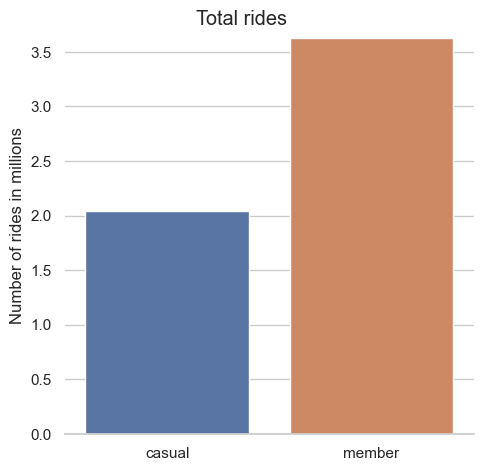

In [97]:
g = sns.catplot(
    data = tr, kind = 'bar',
    x = 'member_casual', y = 'ride_counts_mill'
)

g.fig.suptitle("Total rides")
g.despine(left=True)
g.set_axis_labels("", "Number of rides in millions")

Notes:
1. Members use Cyclistic 75% more than casual riders.
2. Based on note 1, the conclusion that was derived by the financial analysis seems to be backed up by this data too.

### Type of bike

In [86]:
td_clean['rideable_type'] = td_clean['rideable_type'].astype('category')
tob = td_clean[['ride_id','rideable_type','member_casual']].rename(columns={'ride_id':'ride_counts_mill'}).groupby(by=['member_casual','rideable_type'], as_index=False, observed=False).count()
tob['ride_counts_mill'] = tob['ride_counts_mill'] / 1_000_000
tob

,member_casual,rideable_type,ride_counts_mill
0,casual,classic_bike,0.873421
1,casual,docked_bike,0.076549
2,casual,electric_bike,1.093659
3,member,classic_bike,1.808819
4,member,docked_bike,0.000000
5,member,electric_bike,1.821998


C:\Users\luisc\miniconda3\envs\leenv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\luisc\miniconda3\envs\leenv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\luisc\miniconda3\envs\leenv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future

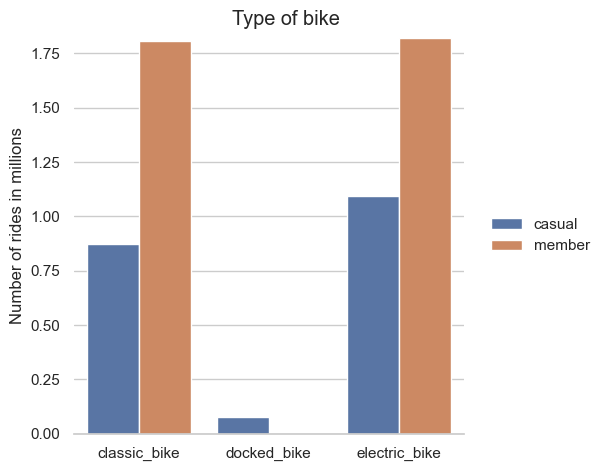

In [98]:
g = sns.catplot(
    data = tob, kind = 'bar',
    x = 'rideable_type', y = 'ride_counts_mill', hue = 'member_casual'
)

g.fig.suptitle("Type of bike")
g.despine(left=True)
g.set_axis_labels("", "Number of rides in millions")
g.legend.set_title("")

Notes:
1. There is no important difference between the preference of a type of bike between members and casual riders.
2. Both members and casual riders split approximately 50%-50% there preference for classic and electric bikes.

### Day of week

In [76]:
td_clean['dow_start'] = td_clean['dow_start'].astype('category')
dow = td_clean[['ride_id','dow_start','member_casual']].rename(columns={'ride_id':'ride_counts_thou'}).groupby(by=['member_casual','dow_start'], as_index=False, observed=False).count()
dow['ride_counts_thou'] = dow['ride_counts_thou'] / 1_000 
dow['dow_start'] = dow['dow_start'].str[:3]
dow

,member_casual,dow_start,ride_counts_thou
0,casual,Fri,310.020
1,casual,Mon,233.182
2,casual,Sat,408.212
3,casual,Sun,331.711
4,casual,Thu,269.990
5,casual,Tue,242.738
6,casual,Wed,247.776
7,member,Fri,525.249
8,member,Mon,491.709
9,member,Sat,467.784


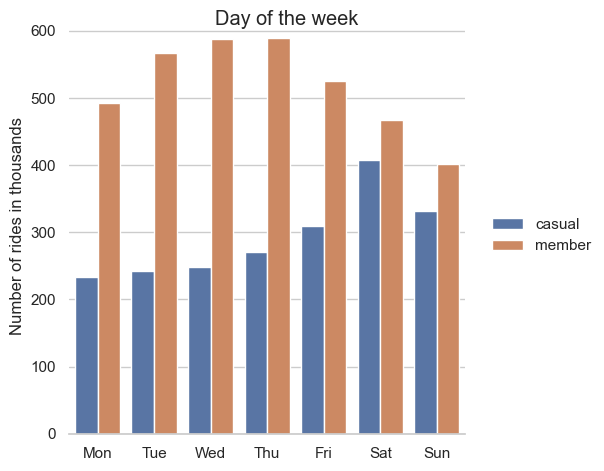

In [82]:
g = sns.catplot(
    data = dow, kind = 'bar',
    x = 'dow_start', y = 'ride_counts_thou', hue = 'member_casual', order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
)

g.fig.suptitle("Day of the week")
g.despine(left=True)
g.set_axis_labels("", "Number of rides in thousands")
g.legend.set_title("")

Notes:
1. Trends of Cyclistic use for members and casual riders are different.
2. Members use more Cyclistic on weekdays, with a peak on Wednesday and Thursday, while casual riders use Cyclistic more on weekends, with a peak on Saturday.
3. Based on note 2, it seems that members may be using Cyclistic bikes for commuting to work and leisure, while casual riders use it more for leisure.

### Rides distribution
Further exploration in the future.

In [3]:
td_clean['ride_duration_min'].describe().apply(lambda x: format(x, 'f'))

count    5674446.000000
mean          18.294872
std          179.892726
min            0.000000
25%            5.433000
50%            9.550000
75%           16.967000
max        98489.067000
Name: ride_duration_min, dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x26b0d918380>,
 'caps': [<matplotlib.lines.Line2D at 0x26b0d918950>,
 'boxes': [<matplotlib.lines.Line2D at 0x26b0d9180e0>],
 'medians': [<matplotlib.lines.Line2D at 0x26b0d918f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x26b0d919220>],
 'means': []}

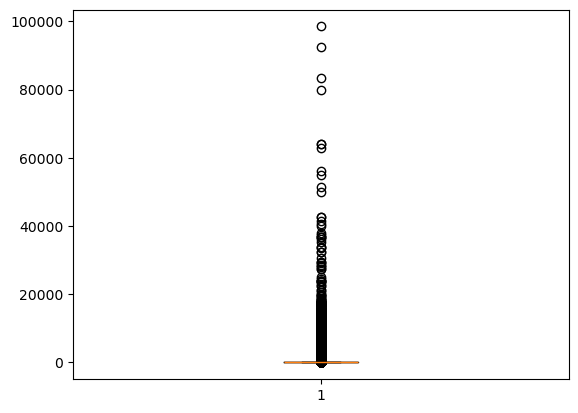

In [4]:
plt.boxplot(td_clean['ride_duration_min'])

There are several duration values that are very large, but **75% of the durations is under 17 minutes**.

To get some context, because the duration values are in minutes, a value of:
-   1,440 min = 1 day
-   4,320 min = 3 days
-  10,080 min = 7 days
-  20,160 min = 14 days
-  34,200 min = 1 month
- 102,600 min = 3 months

This will also be a good time to **ask for clarification** about the validity of such large duration values to someone with domain knowledge. The objective of this would be to implement business rules on how to deal with the outliers. For example, ask them if if it's possible that someone rent a bike for 3 month (max duration value of ~100,000 min). Then, ask them if, in the light of the business task, this unusually large duration values should be removed, or maybe we should focus on them because they are valid values and therefore represent very regular users of Cyclistic.

It's prudent to check if they come from the swapping of the 292 values from 'started_at' and 'ended_at' we did earlier.

In [50]:
td_clean['ride_duration_min'].loc[swap_idx].sort_values(ascending=False)

5172185    16656.517
5209839    16635.217
5189258    16390.133
5185035    16104.550
5208977    10626.400
             ...    
4565948        0.017
4540597        0.017
4536157        0.017
4477787        0.017
4241815        0.017
Name: ride_duration_min, Length: 292, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x24b9d0bfd40>,
 'caps': [<matplotlib.lines.Line2D at 0x24b9d0c43b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24b9d0bfd10>],
 'medians': [<matplotlib.lines.Line2D at 0x24b9d0c4b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x24b9d0c53a0>],
 'means': []}

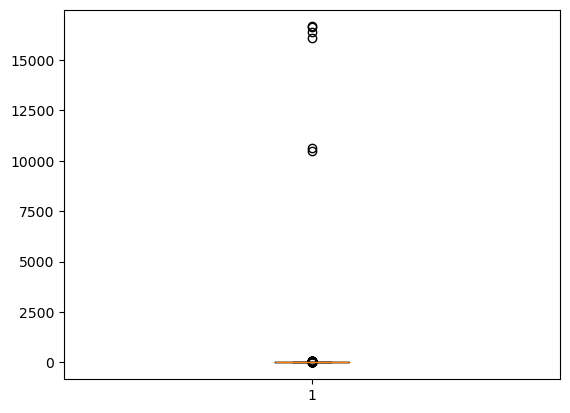

In [54]:
plt.boxplot(td_clean['ride_duration_min'].loc[swap_idx])

From the descriptive statistics and the box and whisker plot, there can be spotted several outliers for the swapped values.

Let's see if there are also outliers for the not-swapped values:

{'whiskers': [<matplotlib.lines.Line2D at 0x24b9d0ec320>,
 'caps': [<matplotlib.lines.Line2D at 0x24b9d0ec740>,
 'boxes': [<matplotlib.lines.Line2D at 0x24b9d0e7e60>],
 'medians': [<matplotlib.lines.Line2D at 0x24b9d0ec470>],
 'fliers': [<matplotlib.lines.Line2D at 0x24b9d0ec710>],
 'means': []}

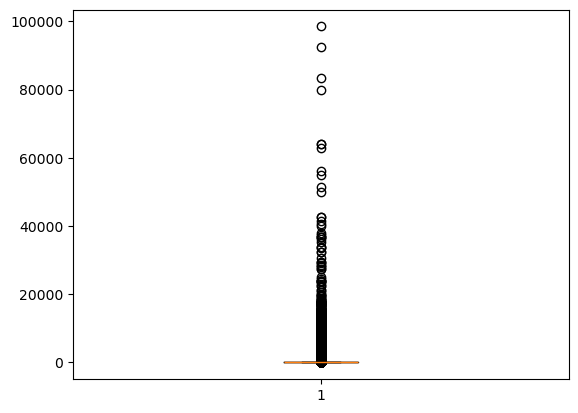

In [62]:
plt.boxplot(td_clean['ride_duration_min'].drop(list(swap_idx)))

There are also several outliers for the not-swapped values, so we can conclude it was not necessarily the swapping that caused the very large durations.

To get some context, because the duration values are in minutes, a value of:
- 1,440  min = 1 day
- 4,320  min = 3 days
- 10,080 min = 7 days
- 20,160 min = 14 days
- 34,200 min = 1 month 

In [40]:
casual_rd = td_clean[['member_casual','ride_duration_min']][td_clean['member_casual'] == 'casual']

casual_rd['ride_duration_min'].describe().apply(lambda x: format(x, 'f'))

count    2043629.000000
mean          28.289480
std          295.115596
min            0.000000
25%            6.650000
50%           11.883000
75%           22.217000
max        98489.067000
Name: ride_duration_min, dtype: object

The max value is very large, approximately 

{'whiskers': [<matplotlib.lines.Line2D at 0x24b98d0ca10>,
 'caps': [<matplotlib.lines.Line2D at 0x24b98d0cfe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24b98726870>],
 'medians': [<matplotlib.lines.Line2D at 0x24b98d0d580>],
 'fliers': [<matplotlib.lines.Line2D at 0x24b98d0d850>],
 'means': []}

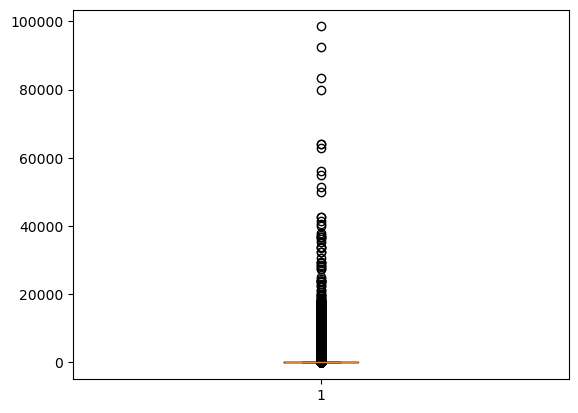

In [42]:
plt.boxplot(casual_rd['ride_duration_min'])

## Conclusions and recommendations

**Conclusions**
1. Members use Cyclistic 75% more than casual riders, which supports the conclusion obtained by the financial analysis that *members are more profitable for the business*.
2. There is no important difference between the preference of a type of bike between members and casual riders.
3. Both members and casual riders split approximately 50%-50% there preference for classic and electric bikes.
4. Trends of Cyclistic use for members and casual riders are different.
5. Members use more Cyclistic on weekdays, with a peak on Wednesday and Thursday, while casual riders use Cyclistic more on weekends, with a peak on Saturday.
6. Based on the previous Conclusion, it seems that members may be using Cyclistic bikes for commuting to work and leisure, while casual riders use it more for leisure.

**Recommendations**
1. The bike fleet should be evenly distributed between classic and electric bikes, to offer both members and casual riders what they are looking for.
2. Offer promotions aimed at casual riders that rent a bike on the weekend for a free day or two on the weekdays. This will give them the opportunity to try Cyclistic for commuting to work and become members when they see the savings it represents.
3. Offer discounts for weekend rides to casual riders that buy a membership.

### Next steps

For each recommendation:
1. Keep the distribution of the bike fleet at it is, approximately 50%-50% between classic and electric bikes.
2. Design the promotions and implement them via the Cyclistic app and advertise it on digital media.
3. Define the discount percentage and implement them via the Cyclistic app and advertise it on digital media.

## Improvement opportunities

### Dirty station data

The null values related to station data could lead to the following limitations:

1. Estimating the most popular stations, since we need both start and end station name or id.
2. Estimating the distance of each ride, since we need both start and end station latitude and longitude.

Possible fixes: !!! Generate a dataframe of the stations and its geographical location. The stations dimensional table could be generated using the 'station_name' information and Google maps. Then evaluate the nearest neighbor for gap-filling missing data !!!

1. Use the start_lat and start_lng of the stations that doesn't have name or id to assign them values.
2. Check if the end_lat and end_lng have name or id to assign them values.

# Appendix

## for Data Description

### files sizes
Return to [Data description](#Prepare:-Data-description)

**IMPORTANT!!! DO NOT RUN**

This section was already run and it's designed to be run only once. So it's here for documentation purposes only.

In [27]:
%%bash
# See the current working directory
pwd

/c/Users/luisc/OneDrive - Colegio Federado de Ingenieros y de Arquitectos/DataScience&Coding/CaseStudies/2_BikeShareBusiness_GoogleDataAnalystics_Coursera/originalData


In [16]:
%%bash
# Unzip all monthly files 
for i in *.zip
do
    unzip $i
done

Archive:  202302-divvy-tripdata.zip
  inflating: 202302-divvy-tripdata.csv  
  inflating: __MACOSX/._202302-divvy-tripdata.csv  
Archive:  202303-divvy-tripdata.zip
  inflating: 202303-divvy-tripdata.csv  
  inflating: __MACOSX/._202303-divvy-tripdata.csv  
Archive:  202304-divvy-tripdata.zip
  inflating: 202304-divvy-tripdata.csv  
  inflating: __MACOSX/._202304-divvy-tripdata.csv  
Archive:  202305-divvy-tripdata.zip
  inflating: 202305-divvy-tripdata.csv  
  inflating: __MACOSX/._202305-divvy-tripdata.csv  
Archive:  202306-divvy-tripdata.zip
  inflating: 202306-divvy-tripdata.csv  
  inflating: __MACOSX/._202306-divvy-tripdata.csv  
Archive:  202307-divvy-tripdata.zip
  inflating: 202307-divvy-tripdata.csv  
  inflating: __MACOSX/._202307-divvy-tripdata.csv  
Archive:  202308-divvy-tripdata.zip
  inflating: 202308-divvy-tripdata.csv  
  inflating: __MACOSX/._202308-divvy-tripdata.csv  
Archive:  202309-divvy-tripdata.zip
  inflating: 202309-divvy-tripdata.csv  
  inflating: __MACOS

In [23]:
%%bash
# Remove directory containing files for MAC users.
rm -r ./__MACOSX

# Move all CSV files to the "workedData" directory. these files are the ones that will be worked on.
for i in *.csv
do
    mv $i /c/Users/luisc/"OneDrive - Colegio Federado de Ingenieros y de Arquitectos"/"DataScience&Coding"/CaseStudies/"2_BikeShareBusiness_GoogleDataAnalystics_Coursera"/workedData/   
done

# Check if the files were moved.
ls

202302-divvy-tripdata.zip
202303-divvy-tripdata.zip
202304-divvy-tripdata.zip
202305-divvy-tripdata.zip
202306-divvy-tripdata.zip
202307-divvy-tripdata.zip
202308-divvy-tripdata.zip
202309-divvy-tripdata.zip
202310-divvy-tripdata.zip
202311-divvy-tripdata.zip
202312-divvy-tripdata.zip
202401-divvy-tripdata.zip


In [31]:
%%bash

# Set current working directory.
cd /c/Users/luisc/"OneDrive - Colegio Federado de Ingenieros y de Arquitectos"/"DataScience&Coding"/CaseStudies/"2_BikeShareBusiness_GoogleDataAnalystics_Coursera"/workedData/

# Check the characteristics of the files.
## Columns correspond to writing permissions, user, ?, size, date modified, file name.
ls -alh *.csv

-rw-r--r-- 1 luisc 197609  37M Mar  7  2023 202302-divvy-tripdata.csv
-rw-r--r-- 1 luisc 197609  50M Apr  6  2023 202303-divvy-tripdata.csv
-rw-r--r-- 1 luisc 197609  82M May  4  2023 202304-divvy-tripdata.csv
-rw-r--r-- 1 luisc 197609 117M Jun  8  2023 202305-divvy-tripdata.csv
-rw-r--r-- 1 luisc 197609 138M Jul 12  2023 202306-divvy-tripdata.csv
-rw-r--r-- 1 luisc 197609 147M Aug 14  2023 202307-divvy-tripdata.csv
-rw-r--r-- 1 luisc 197609 148M Oct 11 20:34 202308-divvy-tripdata.csv
-rw-r--r-- 1 luisc 197609 128M Oct 11 20:37 202309-divvy-tripdata.csv
-rw-r--r-- 1 luisc 197609 103M Nov 13 09:57 202310-divvy-tripdata.csv
-rw-r--r-- 1 luisc 197609  70M Dec  5 12:22 202311-divvy-tripdata.csv
-rw-r--r-- 1 luisc 197609  43M Jan  4 13:41 202312-divvy-tripdata.csv
-rw-r--r-- 1 luisc 197609  29M Feb 19 17:28 202401-divvy-tripdata.csv


In [61]:
# Getting file sizes to inspect them.

fpath = "C:\\Users\\luisc\\OneDrive - Colegio Federado de Ingenieros y de Arquitectos\\DataScience&Coding\\CaseStudies\\2_BikeShareBusiness_GoogleDataAnalystics_Coursera\\workedData"

file_sizes = {}

for fname in os.listdir(fpath):
    filepath = fpath + '\\' + fname
    file_stats = os.stat(filepath)
    file_sizes[fname[0:6]] = round(file_stats.st_size/1024**2) # 1024**2 to get the size in mega bytes.

file_sizes

{'202302': 37,
 '202303': 50,
 '202304': 82,
 '202305': 116,
 '202306': 138,
 '202307': 147,
 '202308': 148,
 '202309': 128,
 '202310': 103,
 '202311': 70,
 '202312': 43,
 '202401': 28}

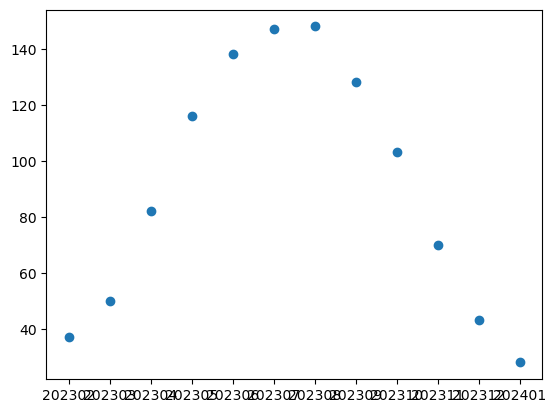

In [71]:
x = list(file_sizes.keys())
y = [val for val in file_sizes.values()]

plt.scatter(x, y)

In [75]:
pd.Series(y).describe()

count     12.000000
mean      90.833333
std       44.846878
min       28.000000
25%       48.250000
50%       92.500000
75%      130.500000
max      148.000000
dtype: float64

End of section.
Return to [Data description](#Prepare:-Data-description)

### file preview
Return to [Data description](#Prepare:-Data-description)

In [8]:
fpath = "C:\\Users\\luisc\\OneDrive - Colegio Federado de Ingenieros y de Arquitectos\\DataScience&Coding\\CaseStudies\\2_BikeShareBusiness_GoogleDataAnalystics_Coursera\\workedData"

fname = "202401-divvy-tripdata.csv"

td_202401 = pd.read_csv(fpath + '\\' + fname)
td_202401.info()
td_202401.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144873 entries, 0 to 144872
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             144873 non-null  object 
 1   rideable_type       144873 non-null  object 
 2   started_at          144873 non-null  object 
 3   ended_at            144873 non-null  object 
 4   start_station_name  125708 non-null  object 
 5   start_station_id    125708 non-null  object 
 6   end_station_name    124124 non-null  object 
 7   end_station_id      124124 non-null  object 
 8   start_lat           144873 non-null  float64
 9   start_lng           144873 non-null  float64
 10  end_lat             144585 non-null  float64
 11  end_lng             144585 non-null  float64
 12  member_casual       144873 non-null  object 
dtypes: float64(4), object(9)
memory usage: 14.4+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member


Observations:
- 'started_at' and 'ended_at' should be of type datetime.
- all other types seem correct, since type object are string or mixed numeric and non-numeric values.

End of section.
Return to [Data description](#Prepare:-Data-description)